## Introduction
    Support Vector Machine is a model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems.
    The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes. 
    SVMs find a separating line(or hyperplane) between data of different classes. It takes the data as an input and outputs a line that separates those classes if possible.
    
    Suppose we have a dataset as shown below and you need to classify the red rectangles from the blue ellipses(let’s say positives from the negatives). So our task is to find an ideal line that separates this dataset in two classes (say red and blue).
   ![alt text](intro.png "Title")
        
    Now the question is there can be many lines that can seperate this data. What line we will choose to seperate them. To decide what line we will choose to seperate the classes we choose a kernel function.

## Kernel Functions:
    SVM algorithms use a set of mathematical functions that are defined as the kernel. The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions. These functions can be different types. For example linear, nonlinear, polynomial etc

### Linear kernel :
    Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. We go for linear SVM kernel if we have a large number of features (>1000) because it is more likely that the data is linearly separable in high dimensional space.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [46]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target
print ("Total number of data points :", len(X))
print (" Classes :", np.unique(y))


Total number of data points : 150
 Classes : [0 1 2]


In [47]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

In [48]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

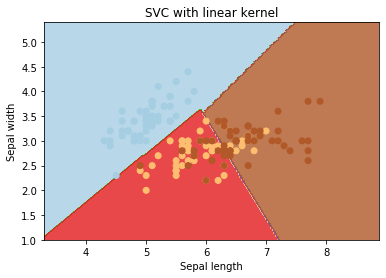

In [49]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

    Here svm has drawn linear boundary for each class. Each color represents a boundry of a unique class

### Non Linear kernel :
    Linear Kernel is used when the data is not Linearly separable. So we use a curve or more than two lines to fit the data.

In [55]:
svc = svm.SVC(kernel='poly', C=1,gamma=1.4).fit(X, y)

In [56]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

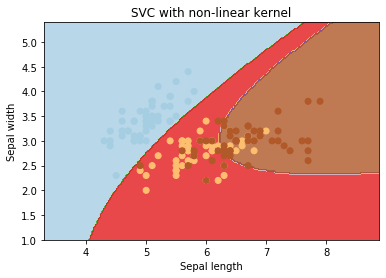

In [57]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with non-linear kernel')
plt.show()

In [58]:
svc = svm.SVC(kernel='rbf', C=1,gamma=1.4).fit(X, y)

In [59]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

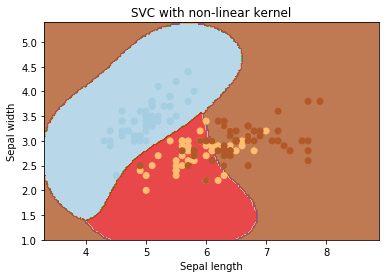

In [60]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with non-linear kernel')
plt.show()

### One-class SVM:    
    One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set. We will be using one class SVM to remove outliers from our data

In [80]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)


Counter({0: 9990, 1: 10})


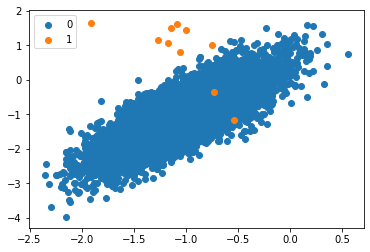

In [81]:
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [82]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.123


## TO DO

1) Implement svm algoirthm with this data set : https://archive.ics.uci.edu/ml/datasets/Abalone

2) Try the linear and non linear svm on same data set and see its performance. Is is performing good ?

3) Try to play with the value of gamma and C, and see how it effects the results

## Refrences :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989